#**Store Sales - Price Prediction**


##**Introduction**
Time Series is a type of data that measures how things change over time. In a time series dataset, the time column does not represent the variable per se, instead, it's more useful to think of it as a primary structure for ordering the dataset.

Building Machine Learning (ML) Models with time series data is often time consuming and complex, with many factors to consider, such as iterating through algorithms, turning ML hyperparameters, and applying feature engineering techniques.

In this project, I will be using time-series forecasting to forecast store sales on data from a large grocery retailer. Specifically, I will build a model that more accurately predicts the unit sales for thousands of items sold at different stores in the chain

## Exploratory Data Analysis (EDA)

Before building any model, the data will be explored to understand the dataset being used.

Seven(7) files have been provided. A description for each file has been given below:

###**1. Train Data (_csv_):** 
The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales. 

**store_nbr** identifies the store at which the products are sold.

**family** identifies the category of product sold.

**sales** give the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).

**onpromotion** gives the total number of items in a product family that were being promoted at a store on a given date.

###**2. Test Data (_csv_):**
The test data has the same features as the training data. Target sales will be predicted for the dates in this file. The dates in the test data are for the 15 days after the last date in the training data.

###**3. Sample Submission Data (_csv_):**
The sample submission data is a file which contains examples of how the submission file should be presented after a model has been built.

###**4. Stores Data (_csv_):**
The stores metadata contains the city, state, type and cluster grouping of similar stores

###**5. Transactions Data (_csv_):**
The transactions data contains date, store_nbr and the number of transactions made on each date. The relationship between the transactions data and sales column of the train data would be investigated to identify any correlations

###**6. Holidays and Events Data (_csv_):**
This data includes Holidays and Events with metadata. Special attention would be paid to the transferred column. A holiday that is transferred officially falls on that calendar day but was moved to another date by the
government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where the type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break
across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to pay back the
Bridge. Adittional holidays are days added to a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).

###**7. Oil Data (_csv_):**
This data contains the daily oil price including values during both train and  test data timeframes. Ecuador is an oil-dependent country and its economic health is highly vulnerable to shocks in oil prices.

In [1]:
# Upload Data to Google Colab

from google.colab import files
files.upload()

{}

In [2]:
# Import Modules and Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

import warnings
warnings.simplefilter('ignore')

## EDA, Data Cleaning and Visualizations

### Train Data

The Train Data will be used in making predictions

In [3]:
# Import Train Data
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Store Sales - Time Series Forecasting/train.csv')

# In time series forecasting, dates must be in the datetime format
train["date"] = pd.to_datetime(train.date)
train.head(10)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0.0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0.0
6,6,2013-01-01,1,CELEBRATION,0.0,0.0
7,7,2013-01-01,1,CLEANING,0.0,0.0
8,8,2013-01-01,1,DAIRY,0.0,0.0
9,9,2013-01-01,1,DELI,0.0,0.0


In [4]:
# Define a function to return key summary statistics of Data
def dataframe_name(i):
    name =[x for x in globals() if globals()[x] is i][0]
    return name

def data_summary(dataframe):
    print('Name of dataframe: ',dataframe_name(dataframe))
    # print(dataframe_name(dataframe))
    print('')
    print('Shape of dataframe')
    print(dataframe.shape)
    print('')
    print('Head of dataframe')
    print(dataframe.head(5))
    print('')
    print('Tail of dataframe')
    print(dataframe.tail(5))
    print('')
    print('Concise summary of dataframe')
    print(dataframe.info())
    print('')
    print('Check for missing values')
    print(dataframe.isnull().sum())
    print('')
    print('Check for unique values')
    print(dataframe.nunique())
    
    print('Check dataframe for numeric and categorical variables')
    numeric_variables = dataframe.select_dtypes(include=[np.number])
    print('Numeric variables in the given dataframe : ',numeric_variables.shape[1])
    
    categorical_variables = dataframe.select_dtypes(exclude=[np.number])
    print('Categorical variables in the given dataframe: ',categorical_variables.shape[1])

In [5]:
data_summary(train)

Name of dataframe:  train

Shape of dataframe
(3000888, 6)

Head of dataframe
   id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0          0.0
1   1 2013-01-01          1   BABY CARE    0.0          0.0
2   2 2013-01-01          1      BEAUTY    0.0          0.0
3   3 2013-01-01          1   BEVERAGES    0.0          0.0
4   4 2013-01-01          1       BOOKS    0.0          0.0

Tail of dataframe
              id       date  ...     sales onpromotion
3000883  3000883 2017-08-15  ...   438.133        15.0
3000884  3000884 2017-08-15  ...   154.553         8.0
3000885  3000885 2017-08-15  ...  2419.729       148.0
3000886  3000886 2017-08-15  ...   121.000        10.0
3000887  3000887 2017-08-15  ...    16.000         2.0

[5 rows x 6 columns]

Concise summary of dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------     

### Test Data

The Test Data includes the features(x) from the Train data and will be used to forecast the store sales(y)

In [6]:
# Test Data
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Store Sales - Time Series Forecasting/test.csv')
test_data["date"] = pd.to_datetime(test_data.date)

test_data.head(10)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,20.0
1,3000889,2017-08-16,1,BABY CARE,1.0
2,3000890,2017-08-16,1,BEAUTY,8.0
3,3000891,2017-08-16,1,BEVERAGES,560.0
4,3000892,2017-08-16,1,BOOKS,1.0
5,3000893,2017-08-16,1,BREAD/BAKERY,131.0
6,3000894,2017-08-16,1,CELEBRATION,29.0
7,3000895,2017-08-16,1,CLEANING,438.0
8,3000896,2017-08-16,1,DAIRY,226.0
9,3000897,2017-08-16,1,DELI,90.0


In [7]:
data_summary(test_data)

Name of dataframe:  test_data

Shape of dataframe
(28512, 5)

Head of dataframe
        id       date  store_nbr      family  onpromotion
0  3000888 2017-08-16          1  AUTOMOTIVE         20.0
1  3000889 2017-08-16          1   BABY CARE          1.0
2  3000890 2017-08-16          1      BEAUTY          8.0
3  3000891 2017-08-16          1   BEVERAGES        560.0
4  3000892 2017-08-16          1       BOOKS          1.0

Tail of dataframe
            id       date  store_nbr                      family  onpromotion
28507  3029395 2017-08-31          9                     POULTRY         54.0
28508  3029396 2017-08-31          9              PREPARED FOODS         10.0
28509  3029397 2017-08-31          9                     PRODUCE        302.0
28510  3029398 2017-08-31          9  SCHOOL AND OFFICE SUPPLIES         15.0
28511  3029399 2017-08-31          9                     SEAFOOD          8.0

Concise summary of dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512

### Stores Data

In [8]:
# Import Stores Data
stores = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Store Sales - Time Series Forecasting/stores.csv')

# Call function to return Summary Statistics of Stores Data
data_summary(stores)

Name of dataframe:  stores

Shape of dataframe
(54, 5)

Head of dataframe
   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

Tail of dataframe
    store_nbr       city       state type  cluster
49         50     Ambato  Tungurahua    A       14
50         51  Guayaquil      Guayas    A       17
51         52      Manta      Manabi    A       11
52         53      Manta      Manabi    D       13
53         54  El Carmen      Manabi    C        3

Concise summary of dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null 

In [9]:
# Display Individual Store Types
stores.type.value_counts()

D    18
C    15
A     9
B     8
E     4
Name: type, dtype: int64

In [10]:
# Number of Stores grouped by States
stores.state.value_counts()

Pichincha                         19
Guayas                            11
Azuay                              3
Santo Domingo de los Tsachilas     3
Manabi                             3
Cotopaxi                           2
Tungurahua                         2
El Oro                             2
Los Rios                           2
Imbabura                           1
Bolivar                            1
Pastaza                            1
Esmeraldas                         1
Loja                               1
Santa Elena                        1
Chimborazo                         1
Name: state, dtype: int64

In [11]:
# Number of Stores grouped by Cities
stores.city.value_counts()

Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Puyo              1
Babahoyo          1
Quevedo           1
Loja              1
Salinas           1
Libertad          1
Daule             1
Esmeraldas        1
El Carmen         1
Ibarra            1
Riobamba          1
Playas            1
Guaranda          1
Cayambe           1
Name: city, dtype: int64

Text(0.5, 0, 'Count')

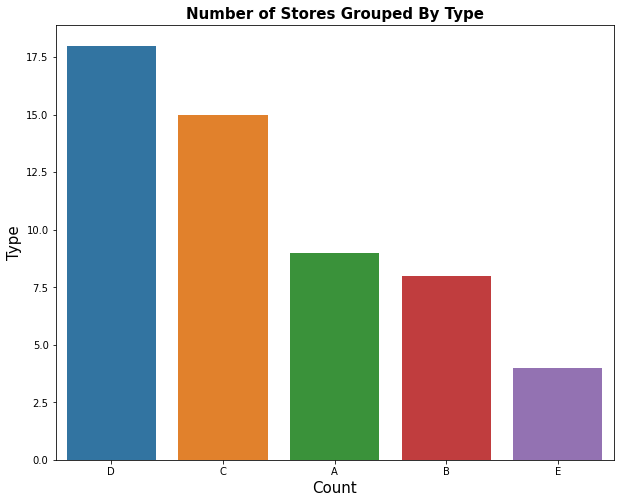

In [12]:
# Visualization of Store Type
plt.figure(figsize=(10, 8))
sns.countplot(data=stores, x='type',
              order=stores.type.value_counts().index,)
plt.title('Number of Stores Grouped By Type',fontweight="bold",fontsize=15)
plt.ylabel('Type', fontsize=15)
plt.xlabel('Count', fontsize=15)

Text(0.5, 0, 'Count')

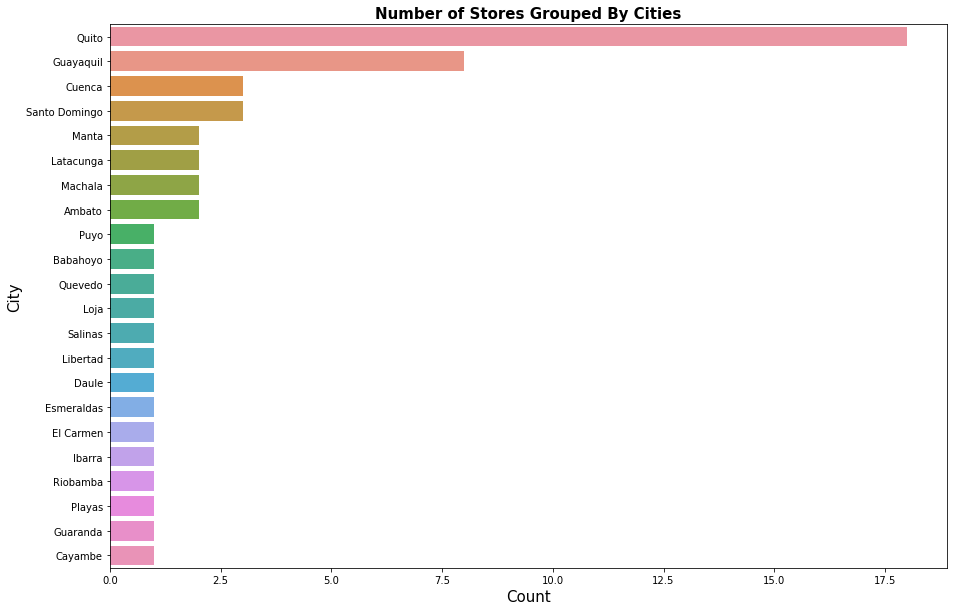

In [13]:
# Visualization of Store Type
plt.figure(figsize=(15, 10))
sns.countplot(data=stores, y='city', 
              order=stores.city.value_counts().index)
plt.title('Number of Stores Grouped By Cities',fontweight="bold",fontsize=15)
plt.ylabel('City', fontsize=15)
plt.xlabel('Count', fontsize=15)

Text(0.5, 0, 'Count')

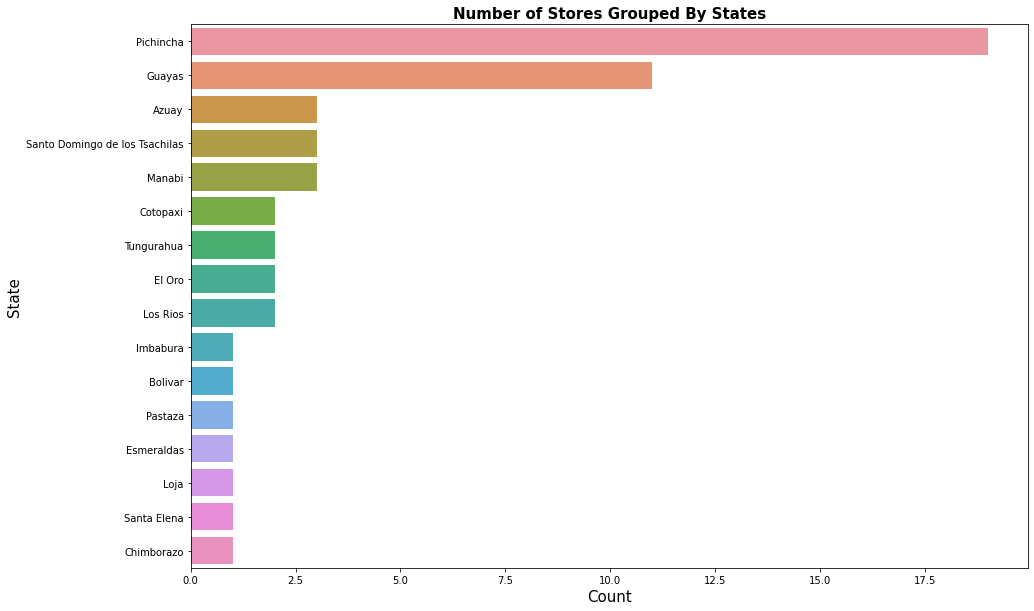

In [14]:
# Visualization of Store States
plt.figure(figsize=(15, 10))
sns.countplot(data=stores, y='state', 
              order=stores.state.value_counts().index)
plt.title('Number of Stores Grouped By States',fontweight="bold",fontsize=15)
plt.ylabel('State', fontsize=15)
plt.xlabel('Count', fontsize=15)

### Transactions Data

The transactions data ideally should correspond with the number of sales made per day in the train data. This would be investigated and the relationship would be determined. A high correlation would mean that the transactions data should be considered in building the time series forecasting model

In [15]:
# Import Transactions Data
transactions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Store Sales - Time Series Forecasting/transactions.csv')

transactions.head(5)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [16]:
# Convert date column to datetime object
transactions["date"] = pd.to_datetime(transactions.date)

# Call function to return Summary Statistics of Transactions Data
data_summary(transactions)

Name of dataframe:  transactions

Shape of dataframe
(83488, 3)

Head of dataframe
        date  store_nbr  transactions
0 2013-01-01         25           770
1 2013-01-02          1          2111
2 2013-01-02          2          2358
3 2013-01-02          3          3487
4 2013-01-02          4          1922

Tail of dataframe
            date  store_nbr  transactions
83483 2017-08-15         50          2804
83484 2017-08-15         51          1573
83485 2017-08-15         52          2255
83486 2017-08-15         53           932
83487 2017-08-15         54           802

Concise summary of dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int

In [17]:
# Visualization of the Transactions of each Store
px.line(transactions.sort_values(["store_nbr", "date"]), x='date', y='transactions', color='store_nbr',title = "Graph of Transactions of Each Store" )

Output hidden; open in https://colab.research.google.com to view.

In [18]:
# Box Plots to check seasonality and stable patterns
box_plot = transactions.copy()
box_plot["year"] = box_plot.date.dt.year
box_plot["month"] = box_plot.date.dt.month
px.box(box_plot, x="year", y="transactions", color = "month", title = "Boxplots of Transactions for Each Month")

### Oils Data

Ecuador is an oil-dependent country, hence a change in oil price is expected to influence sales. Thus, changing oil prices would cause a variance in the model.

In [19]:
# Import Oils Data
oils = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Store Sales - Time Series Forecasting/oil.csv')
oils.head(5)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [20]:
# Convert date column to datetime object
oils["date"] = pd.to_datetime(oils.date)

# Call function to return Summary Statistics of Oils Data
data_summary(oils)

Name of dataframe:  oils

Shape of dataframe
(1218, 2)

Head of dataframe
        date  dcoilwtico
0 2013-01-01         NaN
1 2013-01-02       93.14
2 2013-01-03       92.97
3 2013-01-04       93.12
4 2013-01-07       93.20

Tail of dataframe
           date  dcoilwtico
1213 2017-08-25       47.65
1214 2017-08-28       46.40
1215 2017-08-29       46.46
1216 2017-08-30       45.96
1217 2017-08-31       47.26

Concise summary of dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB
None

Check for missing values
date           0
dcoilwtico    43
dtype: int64

Check for unique values
date          1218
dcoilwtico     998
dtype: int64
Check dataframe for numeric and categorical var

As seen above, there are 43 missing data points in the daily oils data and this can be treated using various imputation methods. In this case, I will use the Linear Interpolation method.

In [21]:
# Reset index of oils dataframe
oils = oils.set_index("date").dcoilwtico.resample("D").sum().reset_index()

# Linear Interpolation of Missing Values
oils["dcoilwtico"] = np.where(oils["dcoilwtico"] == 0, np.nan, oils["dcoilwtico"])
oils["interpolated_dcoilwtico"] =oils.dcoilwtico.interpolate()


# Check if missing values have been filled
oils.isnull().sum()

# No missing values now

date                         0
dcoilwtico                 529
interpolated_dcoilwtico      1
dtype: int64

In [22]:
# Plot showing the effects of linear interpolation

plot = oils.melt(id_vars=['date']+list(oils.keys()[5:]), var_name='Key')
px.line(plot.sort_values(["Key", "date"], ascending = [False, True]), x = 'date', y = 'value', color = 'Key', title = "Daily Oil Price")

Due to Ecuador's dependence on oil, higher oil prices would mean the economy is not doing well, hence sales would drop. This would be investigated later on with Pearson's correlation coefficient

### Holidays and Events Data

The Holidays and Events Data is generally Metadata, and needs to be split logically for it to be useful


In [23]:
# Import Holidays data
holidays = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Store Sales - Time Series Forecasting/holidays_events.csv')
holidays["date"] = pd.to_datetime(holidays.date)

# Call function to return Summary Statistics of Holidays and Events Data
data_summary(holidays)

Name of dataframe:  holidays

Shape of dataframe
(350, 6)

Head of dataframe
        date     type  ...                    description transferred
0 2012-03-02  Holiday  ...             Fundacion de Manta       False
1 2012-04-01  Holiday  ...  Provincializacion de Cotopaxi       False
2 2012-04-12  Holiday  ...            Fundacion de Cuenca       False
3 2012-04-14  Holiday  ...      Cantonizacion de Libertad       False
4 2012-04-21  Holiday  ...      Cantonizacion de Riobamba       False

[5 rows x 6 columns]

Tail of dataframe
          date        type    locale locale_name description  transferred
345 2017-12-22  Additional  National     Ecuador   Navidad-3        False
346 2017-12-23  Additional  National     Ecuador   Navidad-2        False
347 2017-12-24  Additional  National     Ecuador   Navidad-1        False
348 2017-12-25     Holiday  National     Ecuador     Navidad        False
349 2017-12-26  Additional  National     Ecuador   Navidad+1        False

Concise summary o

### Time Series Plots


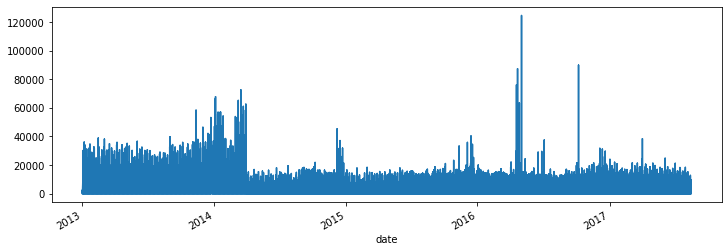

In [24]:
# A time series plot for each of the 54 stores will give us an idea of the distribution of total sales

a = train.groupby(["date", "store_nbr","onpromotion"]).sales.sum().reset_index()
_ = a.set_index('date')['sales'].plot(figsize=(12, 4))

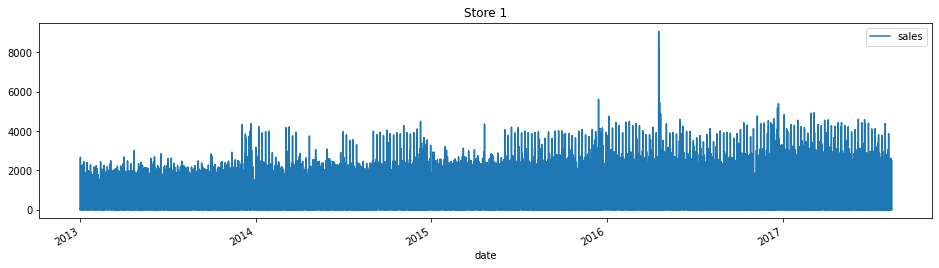

In [25]:
STORE_NO = 1
fltr = train['store_nbr'] == STORE_NO
_ = train[fltr].set_index('date')[['sales']].plot(figsize=(16, 4), title = f'Store {STORE_NO}')

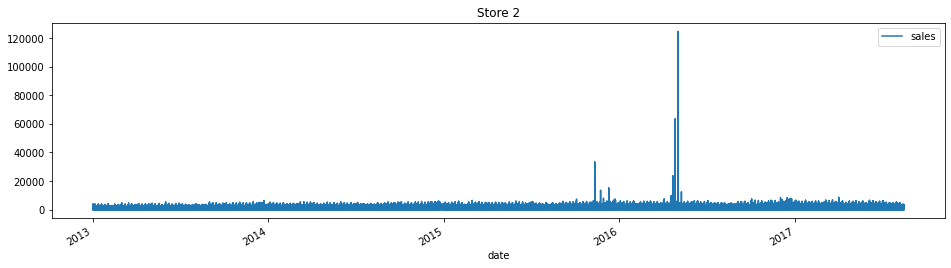

In [26]:
STORE_NO = 2
fltr = train['store_nbr'] == STORE_NO
_ = train[fltr].set_index('date')[['sales']].plot(figsize=(16, 4), title = f'Store {STORE_NO}')

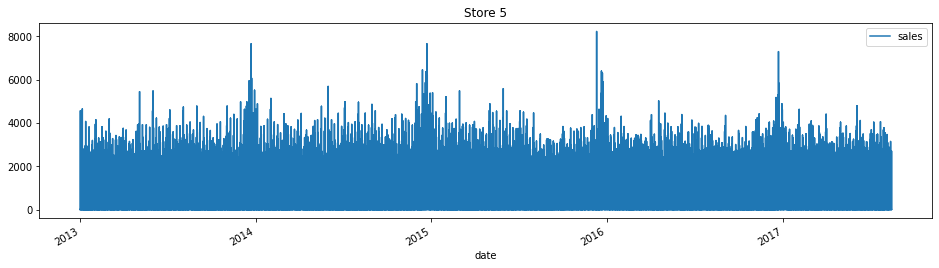

In [27]:
STORE_NO = 5
fltr = train['store_nbr'] == STORE_NO
_ = train[fltr].set_index('date')[['sales']].plot(figsize=(16, 4), title = f'Store {STORE_NO}')

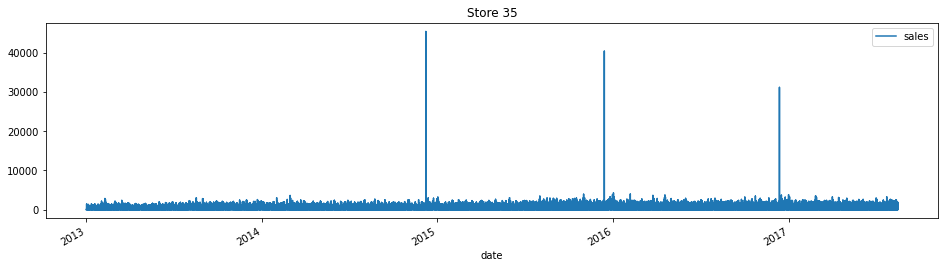

In [28]:
STORE_NO = 35
fltr = train['store_nbr'] == STORE_NO
_ = train[fltr].set_index('date')[['sales']].plot(figsize=(16, 4), title = f'Store {STORE_NO}')

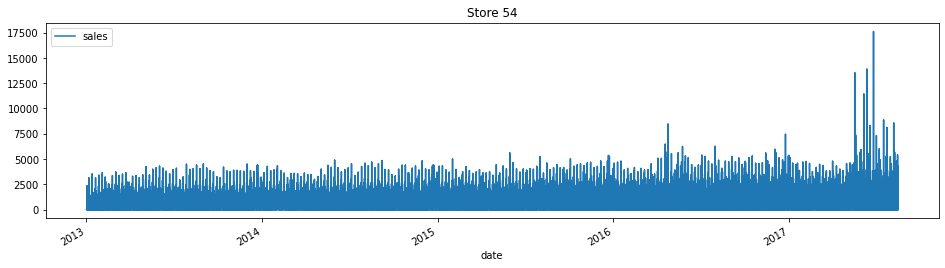

In [29]:
STORE_NO = 54
fltr = train['store_nbr'] == STORE_NO
_ = train[fltr].set_index('date')[['sales']].plot(figsize=(16, 4), title = f'Store {STORE_NO}')

## Feature Engineering and Time Series Data Analysis

Feature engineering is the process of using historical row data to create additional variables and features for the final dataset used for training a model.

The goals of feature engineering are to create the correct input dataset to feed the Machine Learning Algorithm, and to increase the performance of the ML Models by generating valid relationships between the input features and output features.

* In order to account for a possible increase in sales after wages are paid every two weeks, on the 15th and on the last day of the month, two new features will be created from the date column of the train data
* The Transactions data will be merged with the train and test data due to their strong positive correlation.
* The Stores Data will be merged with the train and test data as I will be predicting the number of sales per store.
* The Oils Data will also be merged with the train and test data since the negateive correlation showed a relationship between oil prices and total sales.

### Create New Datetime Features

Date tiime features are features created from the time stamp value of each observation. A few examples of these features are the month, day of week, day, and week of year. Transformations will be performed of these date time features using pandas and adding new columns (day, month, day of week, year columns) to the original dataset.

Date time features are not limited to integer values only. Binary features showing whether a day is a weekend or not can help to build a better model for a time series forecasting solution.

In [30]:
# Create new date features from the date column 
for attr in ['year', 'month', 'week', 'dayofweek']:
  train[attr] = getattr(train['date'].dt, attr)
train

,id,date,store_nbr,family,sales,onpromotion,year,month,week,dayofweek
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0.0,2013,1,1,1
1,1,2013-01-01,1,BABY CARE,0.000,0.0,2013,1,1,1
2,2,2013-01-01,1,BEAUTY,0.000,0.0,2013,1,1,1
3,3,2013-01-01,1,BEVERAGES,0.000,0.0,2013,1,1,1
4,4,2013-01-01,1,BOOKS,0.000,0.0,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,15.0,2017,8,33,1
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,8.0,2017,8,33,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148.0,2017,8,33,1
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,10.0,2017,8,33,1


In [31]:
# Create additional datetime features on train data
train['ismonthend'] = train.date.dt.is_month_end.astype("int64")
train['dayofmonth'] = train.date.dt.day
train['isweekend'] = train.date.dt.weekday // 4

train["wageday"] = pd.Series(np.where((train['ismonthend'] == 1) | (train["dayofmonth"] == 15), 1, 0))
train.head(10)

,id,date,store_nbr,family,sales,onpromotion,year,month,week,dayofweek,ismonthend,dayofmonth,isweekend,wageday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,2013,1,1,1,0,1,0,0
1,1,2013-01-01,1,BABY CARE,0.0,0.0,2013,1,1,1,0,1,0,0
2,2,2013-01-01,1,BEAUTY,0.0,0.0,2013,1,1,1,0,1,0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0.0,2013,1,1,1,0,1,0,0
4,4,2013-01-01,1,BOOKS,0.0,0.0,2013,1,1,1,0,1,0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0.0,2013,1,1,1,0,1,0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0.0,2013,1,1,1,0,1,0,0
7,7,2013-01-01,1,CLEANING,0.0,0.0,2013,1,1,1,0,1,0,0
8,8,2013-01-01,1,DAIRY,0.0,0.0,2013,1,1,1,0,1,0,0
9,9,2013-01-01,1,DELI,0.0,0.0,2013,1,1,1,0,1,0,0


In [32]:
data_summary(train)

Name of dataframe:  __

Shape of dataframe
(3000888, 14)

Head of dataframe
   id       date  store_nbr  ... dayofmonth  isweekend  wageday
0   0 2013-01-01          1  ...          1          0        0
1   1 2013-01-01          1  ...          1          0        0
2   2 2013-01-01          1  ...          1          0        0
3   3 2013-01-01          1  ...          1          0        0
4   4 2013-01-01          1  ...          1          0        0

[5 rows x 14 columns]

Tail of dataframe
              id       date  store_nbr  ... dayofmonth  isweekend  wageday
3000883  3000883 2017-08-15          9  ...         15          0        1
3000884  3000884 2017-08-15          9  ...         15          0        1
3000885  3000885 2017-08-15          9  ...         15          0        1
3000886  3000886 2017-08-15          9  ...         15          0        1
3000887  3000887 2017-08-15          9  ...         15          0        1

[5 rows x 14 columns]

Concise summary of dataf

In [33]:
for attr in ['year', 'month', 'week', 'dayofweek']:
  test_data[attr] = getattr(test_data['date'].dt, attr)

test_data['ismonthend'] = test_data.date.dt.is_month_end.astype("int64")
test_data['dayofmonth'] = test_data.date.dt.day
test_data['isweekend'] = test_data.date.dt.weekday // 4

test_data["wageday"] = pd.Series(np.where((test_data['ismonthend'] == 1) | (test_data["dayofmonth"] == 15), 1, 0))
test_data.head(10)

,id,date,store_nbr,family,onpromotion,year,month,week,dayofweek,ismonthend,dayofmonth,isweekend,wageday
0,3000888,2017-08-16,1,AUTOMOTIVE,20.0,2017,8,33,2,0,16,0,0
1,3000889,2017-08-16,1,BABY CARE,1.0,2017,8,33,2,0,16,0,0
2,3000890,2017-08-16,1,BEAUTY,8.0,2017,8,33,2,0,16,0,0
3,3000891,2017-08-16,1,BEVERAGES,560.0,2017,8,33,2,0,16,0,0
4,3000892,2017-08-16,1,BOOKS,1.0,2017,8,33,2,0,16,0,0
5,3000893,2017-08-16,1,BREAD/BAKERY,131.0,2017,8,33,2,0,16,0,0
6,3000894,2017-08-16,1,CELEBRATION,29.0,2017,8,33,2,0,16,0,0
7,3000895,2017-08-16,1,CLEANING,438.0,2017,8,33,2,0,16,0,0
8,3000896,2017-08-16,1,DAIRY,226.0,2017,8,33,2,0,16,0,0
9,3000897,2017-08-16,1,DELI,90.0,2017,8,33,2,0,16,0,0


In [34]:
test_data.tail(10)

,id,date,store_nbr,family,onpromotion,year,month,week,dayofweek,ismonthend,dayofmonth,isweekend,wageday
28502,3029390,2017-08-31,9,MAGAZINES,6.0,2017,8,35,3,1,31,0,1
28503,3029391,2017-08-31,9,MEATS,82.0,2017,8,35,3,1,31,0,1
28504,3029392,2017-08-31,9,PERSONAL CARE,148.0,2017,8,35,3,1,31,0,1
28505,3029393,2017-08-31,9,PET SUPPLIES,14.0,2017,8,35,3,1,31,0,1
28506,3029394,2017-08-31,9,PLAYERS AND ELECTRONICS,17.0,2017,8,35,3,1,31,0,1
28507,3029395,2017-08-31,9,POULTRY,54.0,2017,8,35,3,1,31,0,1
28508,3029396,2017-08-31,9,PREPARED FOODS,10.0,2017,8,35,3,1,31,0,1
28509,3029397,2017-08-31,9,PRODUCE,302.0,2017,8,35,3,1,31,0,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,15.0,2017,8,35,3,1,31,0,1
28511,3029399,2017-08-31,9,SEAFOOD,8.0,2017,8,35,3,1,31,0,1


### Relationship between Transactions and Sales

In [35]:
train_sum = train.groupby(["date", "store_nbr", "onpromotion"]).sales.sum().reset_index()
train_sum.head(5)

,date,store_nbr,onpromotion,sales
0,2013-01-01,1,0.0,0.0
1,2013-01-01,2,0.0,0.0
2,2013-01-01,3,0.0,0.0
3,2013-01-01,4,0.0,0.0
4,2013-01-01,5,0.0,0.0


In [36]:
# Merge trainsactions and train data
train_m = pd.merge(train_sum, transactions, how = "left")
train_m

,date,store_nbr,onpromotion,sales,transactions
0,2013-01-01,1,0.0,0.000,NaN
1,2013-01-01,2,0.0,0.000,NaN
2,2013-01-01,3,0.0,0.000,NaN
3,2013-01-01,4,0.0,0.000,NaN
4,2013-01-01,5,0.0,0.000,NaN
...,...,...,...,...,...
1339089,2017-08-15,54,72.0,261.000,802.0
1339090,2017-08-15,54,76.0,915.371,802.0
1339091,2017-08-15,54,207.0,1415.000,802.0
1339092,2017-08-15,54,219.0,4332.000,802.0


In [37]:
data_summary(train_m)

Name of dataframe:  _

Shape of dataframe
(1339094, 5)

Head of dataframe
        date  store_nbr  onpromotion  sales  transactions
0 2013-01-01          1          0.0    0.0           NaN
1 2013-01-01          2          0.0    0.0           NaN
2 2013-01-01          3          0.0    0.0           NaN
3 2013-01-01          4          0.0    0.0           NaN
4 2013-01-01          5          0.0    0.0           NaN

Tail of dataframe
              date  store_nbr  onpromotion     sales  transactions
1339089 2017-08-15         54         72.0   261.000         802.0
1339090 2017-08-15         54         76.0   915.371         802.0
1339091 2017-08-15         54        207.0  1415.000         802.0
1339092 2017-08-15         54        219.0  4332.000         802.0
1339093 2017-08-15         54        483.0  4235.000         802.0

Concise summary of dataframe
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339094 entries, 0 to 1339093
Data columns (total 5 columns):
 #   Column    

In [38]:
# check the percentage of null values in transactions column
null_values_per_variable = 100 * (train_m.isnull().sum()/train_m.shape[0]).round(3) #.rest_index()
null_values_per_variable.sort_values(ascending=False)

transactions    0.7
sales           0.0
onpromotion     0.0
store_nbr       0.0
date            0.0
dtype: float64

In [39]:
# Correlation between Sales and Transactions
# The sales data will be summed up and merged with the transactions data

train1 = pd.merge(train.groupby(["date", "store_nbr"]).sales.sum().reset_index(), transactions, how = "left")

# Spearman correlation between Total Sales and Transactions
train1.corr("spearman").sales.loc["transactions"]

# There is a high correlation (0.82) between sales and transactions

0.8174644353073427

Although there's a high correlation between the sales and transactions data, merging the transactions data with the train data will require a summation of all store product families, truncating the rows of training data by two-thirds.

### Oil Price

Does the oil price have an effect on store sales?

In [40]:
# Linear Interpolation of Missing Values
oils["dcoilwtico"] = np.where(oils["dcoilwtico"] == 0, np.nan, oils["dcoilwtico"])
oils["dcoilwtico"] =oils.dcoilwtico.interpolate()

# Reset index of oils dataframe
oils = oils.set_index("date").dcoilwtico.resample("D").sum().reset_index()

# Check if missing values have been filled
oils.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

In [41]:
# Correlation of Sales, Transactions and Oil Prices

oils_corr = pd.merge(train1, oils, how = "left")
print("Correlation of Total Sales and Transactions with Daily Oil Prices")
print(oils_corr.drop(["store_nbr"], axis = 1).corr("spearman").dcoilwtico.loc[["sales", "transactions"]])

Correlation of Total Sales and Transactions with Daily Oil Prices
sales          -0.301110
transactions    0.040133
Name: dcoilwtico, dtype: float64


Here, we see a negative correlation (-0.30) between Oil Prices and Sales, which confirms my suspicion.

### Sales Time Series Analysis

Since the goal of this experiment is to predict the total number of sales, further attention will be given to the total sales column from the train data

In [42]:
# Plot total daily sales of the stores

_ = train.set_index("date").groupby("store_nbr").resample("D").sales.sum().reset_index()
px.line(_, x = "date", y = "sales", color = "store_nbr", title = "Daily Total Sales")

Output hidden; open in https://colab.research.google.com to view.

Analyzing the time series plot for each individual store, some stores have no sales at the beginning of 2013. My best guess is that the store was not in operation by then. The identified stores are stores with store_nbr 20, 21, 22, 29, 36, 42, 52, and 53. These empty sales rows will be dropped as they will affect the quality of the ML Model

Also, some stores had zero sales at certain points within the time series frame, specifically store_nbr 24, 25 and 30.

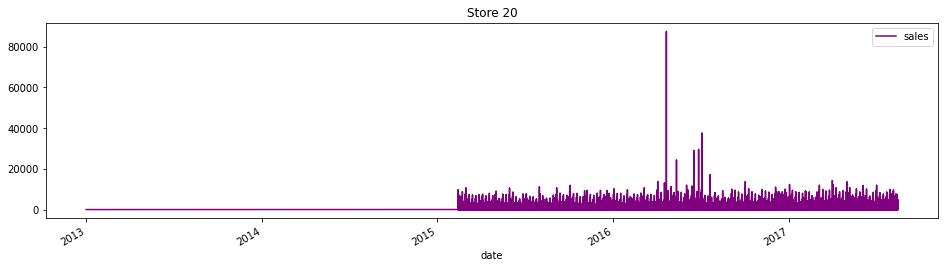

In [43]:
STORE_NO = 20
fltr = train['store_nbr'] == STORE_NO
_ = train[fltr].set_index('date')[['sales']].plot(figsize=(16, 4), color = 'purple', title = f'Store {STORE_NO}')

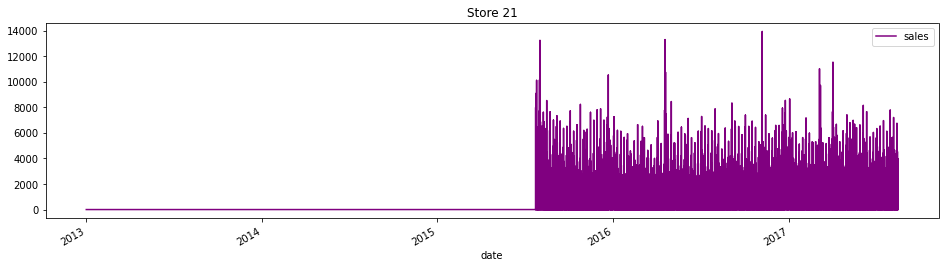

In [44]:
STORE_NO = 21
fltr = train['store_nbr'] == STORE_NO
_ = train[fltr].set_index('date')[['sales']].plot(figsize=(16, 4), color = 'purple', title = f'Store {STORE_NO}')

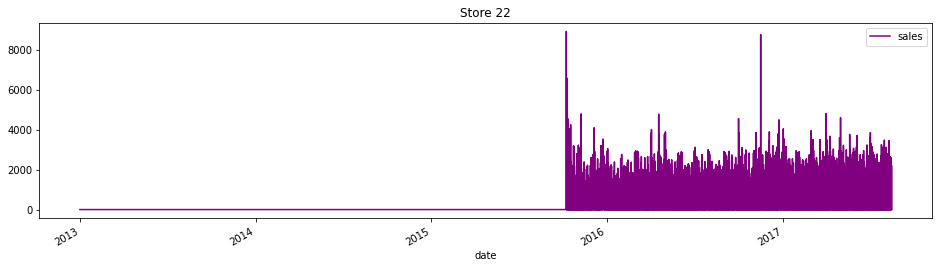

In [45]:
STORE_NO = 22
fltr = train['store_nbr'] == STORE_NO
_ = train[fltr].set_index('date')[['sales']].plot(figsize=(16, 4), color = 'purple', title = f'Store {STORE_NO}')

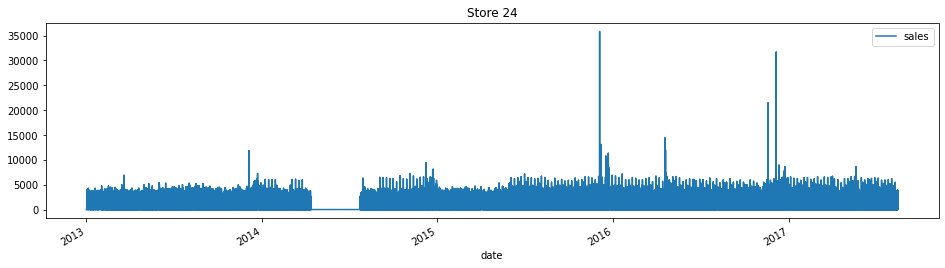

In [46]:
STORE_NO = 24
fltr = train['store_nbr'] == STORE_NO
_ = train[fltr].set_index('date')[['sales']].plot(figsize=(16, 4), title = f'Store {STORE_NO}')

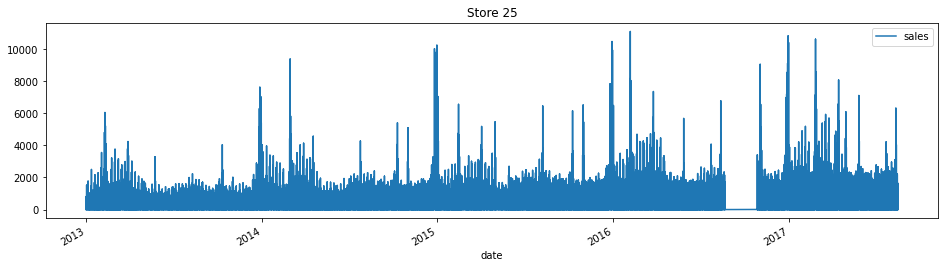

In [47]:
STORE_NO = 25
fltr = train['store_nbr'] == STORE_NO
_ = train[fltr].set_index('date')[['sales']].plot(figsize=(16, 4), title = f'Store {STORE_NO}')

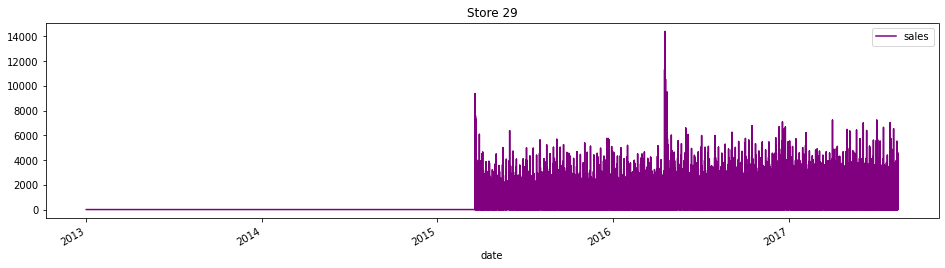

In [48]:
STORE_NO = 29
fltr = train['store_nbr'] == STORE_NO
_ = train[fltr].set_index('date')[['sales']].plot(figsize=(16, 4), color = 'purple', title = f'Store {STORE_NO}')

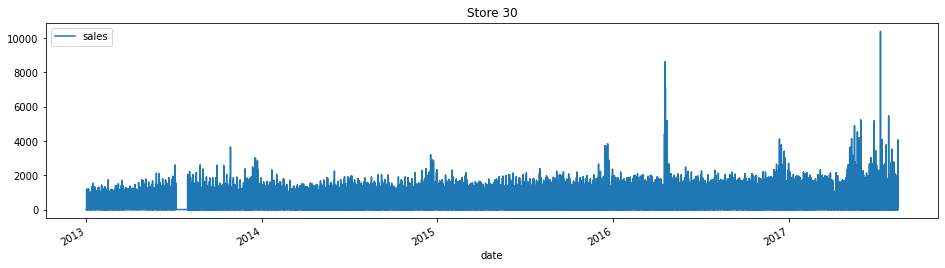

In [49]:
STORE_NO = 30
fltr = train['store_nbr'] == STORE_NO
_ = train[fltr].set_index('date')[['sales']].plot(figsize=(16, 4), title = f'Store {STORE_NO}')

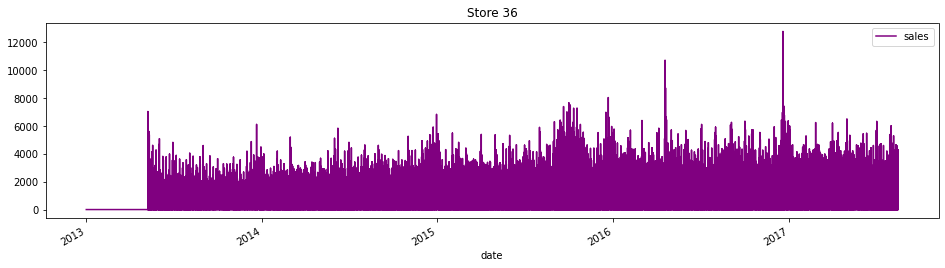

In [50]:
STORE_NO = 36
fltr = train['store_nbr'] == STORE_NO
_ = train[fltr].set_index('date')[['sales']].plot(figsize=(16, 4), color = 'purple', title = f'Store {STORE_NO}')

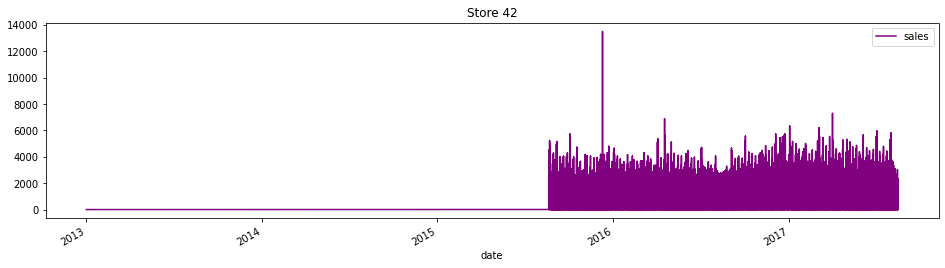

In [51]:
STORE_NO = 42
fltr = train['store_nbr'] == STORE_NO
_ = train[fltr].set_index('date')[['sales']].plot(figsize=(16, 4), color = 'purple', title = f'Store {STORE_NO}')

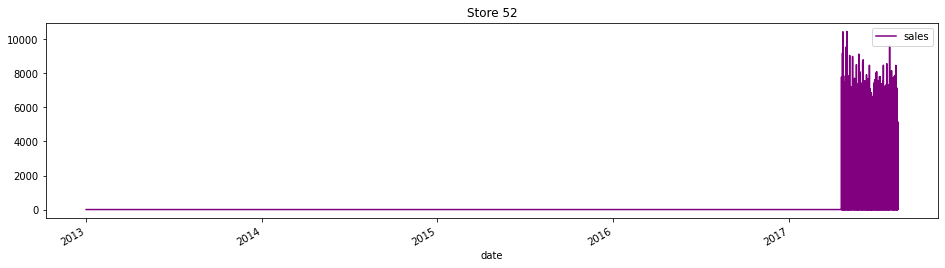

In [52]:
STORE_NO = 52
fltr = train['store_nbr'] == STORE_NO
_ = train[fltr].set_index('date')[['sales']].plot(figsize=(16, 4), color = 'purple', title = f'Store {STORE_NO}')

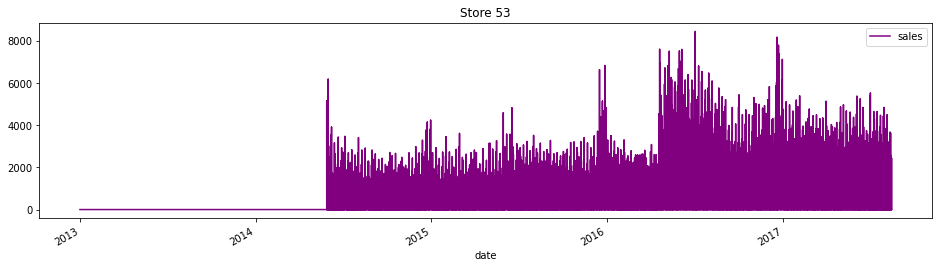

In [53]:
STORE_NO = 53
fltr = train['store_nbr'] == STORE_NO
_ = train[fltr].set_index('date')[['sales']].plot(figsize=(16, 4), color = 'purple', title = f'Store {STORE_NO}')

In [54]:
# Drop empty rows

print(train.shape)
train = train[~((train.store_nbr == 20) & (train.date < "2015-02-13"))]
train = train[~((train.store_nbr == 21) & (train.date < "2015-07-24"))]
train = train[~((train.store_nbr == 22) & (train.date < "2015-10-09"))]
train = train[~((train.store_nbr == 29) & (train.date < "2015-03-20"))]
train = train[~((train.store_nbr == 36) & (train.date < "2013-05-09"))]
train = train[~((train.store_nbr == 42) & (train.date < "2015-08-21"))]
train = train[~((train.store_nbr == 52) & (train.date < "2017-04-20"))]
train = train[~((train.store_nbr == 53) & (train.date < "2014-05-29"))]
print(train.shape)

(3000888, 14)
(2780316, 14)


### Merge Stores Data

In [55]:
# Stores data will be merged with final train and test datasets
train = train.merge(stores, on = 'store_nbr', how = 'left')

# Ismonthend will be dropped, since it was used to generate the wageday column
train = train.drop(columns=['ismonthend'])

train.head()

,id,date,store_nbr,family,sales,onpromotion,year,month,week,dayofweek,dayofmonth,isweekend,wageday,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,2013,1,1,1,1,0,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0.0,2013,1,1,1,1,0,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0.0,2013,1,1,1,1,0,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0.0,2013,1,1,1,1,0,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0.0,2013,1,1,1,1,0,0,Quito,Pichincha,D,13


In [56]:
data_summary(train)

Name of dataframe:  train

Shape of dataframe
(2780316, 17)

Head of dataframe
   id       date  store_nbr      family  ...   city      state  type  cluster
0   0 2013-01-01          1  AUTOMOTIVE  ...  Quito  Pichincha     D       13
1   1 2013-01-01          1   BABY CARE  ...  Quito  Pichincha     D       13
2   2 2013-01-01          1      BEAUTY  ...  Quito  Pichincha     D       13
3   3 2013-01-01          1   BEVERAGES  ...  Quito  Pichincha     D       13
4   4 2013-01-01          1       BOOKS  ...  Quito  Pichincha     D       13

[5 rows x 17 columns]

Tail of dataframe
              id       date  store_nbr  ...      state  type  cluster
2780311  3000883 2017-08-15          9  ...  Pichincha     B        6
2780312  3000884 2017-08-15          9  ...  Pichincha     B        6
2780313  3000885 2017-08-15          9  ...  Pichincha     B        6
2780314  3000886 2017-08-15          9  ...  Pichincha     B        6
2780315  3000887 2017-08-15          9  ...  Pichincha     B 

In [57]:
# Stores data will be merged with test datasets
test = test_data.merge(stores, on = 'store_nbr', how = 'left')

# Ismonthend will be dropped, since it was used to generate the wageday column
test = test.drop(columns=['ismonthend'])

test.head()

,id,date,store_nbr,family,onpromotion,year,month,week,dayofweek,dayofmonth,isweekend,wageday,city,state,type,cluster
0,3000888,2017-08-16,1,AUTOMOTIVE,20.0,2017,8,33,2,16,0,0,Quito,Pichincha,D,13
1,3000889,2017-08-16,1,BABY CARE,1.0,2017,8,33,2,16,0,0,Quito,Pichincha,D,13
2,3000890,2017-08-16,1,BEAUTY,8.0,2017,8,33,2,16,0,0,Quito,Pichincha,D,13
3,3000891,2017-08-16,1,BEVERAGES,560.0,2017,8,33,2,16,0,0,Quito,Pichincha,D,13
4,3000892,2017-08-16,1,BOOKS,1.0,2017,8,33,2,16,0,0,Quito,Pichincha,D,13


In [58]:
data_summary(test)

Name of dataframe:  test

Shape of dataframe
(28512, 16)

Head of dataframe
        id       date  store_nbr      family  ...   city      state  type  cluster
0  3000888 2017-08-16          1  AUTOMOTIVE  ...  Quito  Pichincha     D       13
1  3000889 2017-08-16          1   BABY CARE  ...  Quito  Pichincha     D       13
2  3000890 2017-08-16          1      BEAUTY  ...  Quito  Pichincha     D       13
3  3000891 2017-08-16          1   BEVERAGES  ...  Quito  Pichincha     D       13
4  3000892 2017-08-16          1       BOOKS  ...  Quito  Pichincha     D       13

[5 rows x 16 columns]

Tail of dataframe
            id       date  store_nbr  ...      state  type  cluster
28507  3029395 2017-08-31          9  ...  Pichincha     B        6
28508  3029396 2017-08-31          9  ...  Pichincha     B        6
28509  3029397 2017-08-31          9  ...  Pichincha     B        6
28510  3029398 2017-08-31          9  ...  Pichincha     B        6
28511  3029399 2017-08-31          9  ...  P

In [59]:
# Export Train Data to be used in Azure ML Studio
from google.colab import drive
drive.mount('/drive')

train.to_csv('/drive/MyDrive/Colab Notebooks/train_data.csv')

Mounted at /drive


In [65]:
# Export Test Data to be used in Azure ML Studio
# from google.colab import drive
# drive.mount('/drive')

test.to_csv('/drive/MyDrive/Colab Notebooks/test_data.csv')

## Data Modeling and Algorithm Selection
Now that my data is prepared for modeling, I will build multiple Regression Models in the Microsoft Azure ML Studio and compare the metrics.

### Algorithms Used
* Linear Regression
* Boosted Decision Tree Regression
* Neural Network Regression


Hyperparameter tuning will be applied when necessary to improve the model.

In [61]:
# Convert string categories to numerical categories
# from sklearn import preprocessing
train_ = train.copy()

for column in ['family','city','state','type']:
    le = preprocessing.LabelEncoder()
    train_[str(column+'_num')] = le.fit_transform(train_[column])

# drop columns
train_ = train_.drop(columns=['family','city','state','type'])
train_.head(5)

,id,date,store_nbr,sales,onpromotion,year,month,week,dayofweek,dayofmonth,isweekend,wageday,cluster,family_num,city_num,state_num,type_num
0,0,2013-01-01,1,0.0,0.0,2013,1,1,1,1,0,0,13,0,18,12,3
1,1,2013-01-01,1,0.0,0.0,2013,1,1,1,1,0,0,13,1,18,12,3
2,2,2013-01-01,1,0.0,0.0,2013,1,1,1,1,0,0,13,2,18,12,3
3,3,2013-01-01,1,0.0,0.0,2013,1,1,1,1,0,0,13,3,18,12,3
4,4,2013-01-01,1,0.0,0.0,2013,1,1,1,1,0,0,13,4,18,12,3


## Forecasting and Submission

In [63]:
# Sample Submission File
sample_submission = pd.read_csv('/drive/MyDrive/Colab Notebooks/Store Sales - Time Series Forecasting/sample_submission.csv')

sample_submission.head(10)

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
5,3000893,0.0
6,3000894,0.0
7,3000895,0.0
8,3000896,0.0
9,3000897,0.0


In [64]:
# Define a function to return a submission file in the same format as sample submission file

def download_preds(preds_test, file_name = 'predictions.csv'):

  ## 1. Setting the target column with our obtained predictions
  sample_submission[TARGET_COL] = preds_test

  ## 2. Saving our predictions to a csv file
  sample_submission.to_csv(file_name, index = False)

  ## 3. Downloading and submitting the csv file
  from google.colab import files
  files.download(file_name)

The Azure ML Studio Model Published Model can now be used to forecast stores' sales with the train data